# CSGO Winner Prediction - Group E (GMBD 2020)

#### Predicting whether Counter Strike or Terrorist will be the round winner, using classification models
#### Group members: 
#### Outline of this notebook:
1. Import libraries and load dataset
2. Exploratory data analysis
3. Feature engineering
5. Dimensionality reduction
6. Evaluation of models
7. Final model and exporting results

***

1. create attribute For ROUND. 
2. https://github.com/Skybox-Technologies/csgo-ai-competition/  metadata
3. time to round end
4. bomb exploded - only attply to T? 
5. snapshots are not taken with constant intervals
6. aggregating weapons (maybe give more weight to the more valuable ones)
7. run this on dataiku

## 1. Importing libraries & Load dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

# %load_ext nb_black
pd.set_option("display.max_columns", 1000)
pd.set_option("max_seq_items", 1000)
pd.set_option("display.width", 1000)
np.set_printoptions(threshold=np.inf)

In [2]:
df = pd.read_csv("csgo_round_snapshots.csv")
print(
    "There are {} columns and {} rows in the raw dataset".format(
        df.shape[1], df.shape[0]
    )
)
df.head()

There are 97 columns and 122410 rows in the raw dataset


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [71]:
df[['time_left','ct_score','t_score','bomb_planted','round_winner','t_money','ct_money']].head(50)

,time_left,ct_score,t_score,bomb_planted,round_winner,t_money,ct_money,bomb_planted
0,175.00,0.0,0.0,False,CT,4000.0,4000.0,False
1,156.03,0.0,0.0,False,CT,650.0,600.0,False
2,96.03,0.0,0.0,False,CT,500.0,750.0,False
3,76.03,0.0,0.0,False,CT,500.0,750.0,False
4,174.97,1.0,0.0,False,CT,10750.0,18350.0,False
5,114.97,1.0,0.0,False,CT,10550.0,1750.0,False
6,94.97,1.0,0.0,False,CT,5000.0,1700.0,False
7,74.97,1.0,0.0,False,CT,5000.0,1700.0,False
8,54.97,1.0,0.0,False,CT,2950.0,2300.0,False
9,174.97,2.0,0.0,False,CT,23450.0,19800.0,False


## 2. EDA

In [3]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas', 'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova', 'ct_weapon_p90', 't_weapon_p90',
       'ct_weapon_r8re

In [5]:
df.dtypes.unique()

array([dtype('float64'), dtype('O'), dtype('bool')], dtype=object)

> **The dataset is organized by `ct_` and `t` columns on the same attribute side-by-side. Without plotting correlation, it's reasonable to suspect that there will be high (negative) correlations between ct and t columns.**

In [8]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,2.773638,1.613724,4.273752,4.266187,0.274602,1.243926,0.134613,0.007638,0.573695,0.321191,0.0,0.000082,0.151989,0.106053,0.004011,0.001773,0.110138,0.004738,0.0,0.000792,0.011045,0.110301,0.006919,3.310195,0.000008,0.0,0.063818,0.002729,1.076236,0.052733,0.007557,0.107311,0.004403,0.000049,0.001462,0.002753,0.002034,0.001952,0.146998,0.005645,0.0,0.000008,0.000980,0.000106,0.000163,0.000155,0.0,0.000057,0.0,0.000139,0.000719,0.000008,0.239147,0.824941,0.059505,0.020440,0.046426,0.036468,0.007557,0.000261,0.440675,0.380868,0.061751,0.009386,3.179789,0.122400,0.236974,0.291618,0.174046,0.004934,0.008120,0.028323,0.899101,0.438257,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,2.010915,1.605780,1.205500,1.228325,0.584092,1.363887,0.460303,0.091456,0.673249,0.476667,0.0,0.009038,0.445910,0.379993,0.063206,0.042067,0.388980,0.070780,0.0,0.037148,0.112130,0.405933,0.086935,1.625785,0.002858,0.0,0.262884,0.053096,1.219112,0.247009,0.094191,0.41

> **There are some hugely skewed data, like `ct_money` and `t_money` columns**

In [9]:
missing = 100 * df.isnull().sum() / df.isnull().count().sort_values(ascending=False)
# pd.DataFrame(missing, columns=['column','perc_missing'])
print(missing)

bomb_planted               0.0
ct_armor                   0.0
ct_defuse_kits             0.0
ct_grenade_decoygrenade    0.0
ct_grenade_flashbang       0.0
                          ... 
t_weapon_tec9              0.0
t_weapon_ump45             0.0
t_weapon_usps              0.0
t_weapon_xm1014            0.0
time_left                  0.0
Length: 97, dtype: float64


> **There are no missing values**

In [33]:
# Plotting attributes

<IPython.core.display.Javascript object>

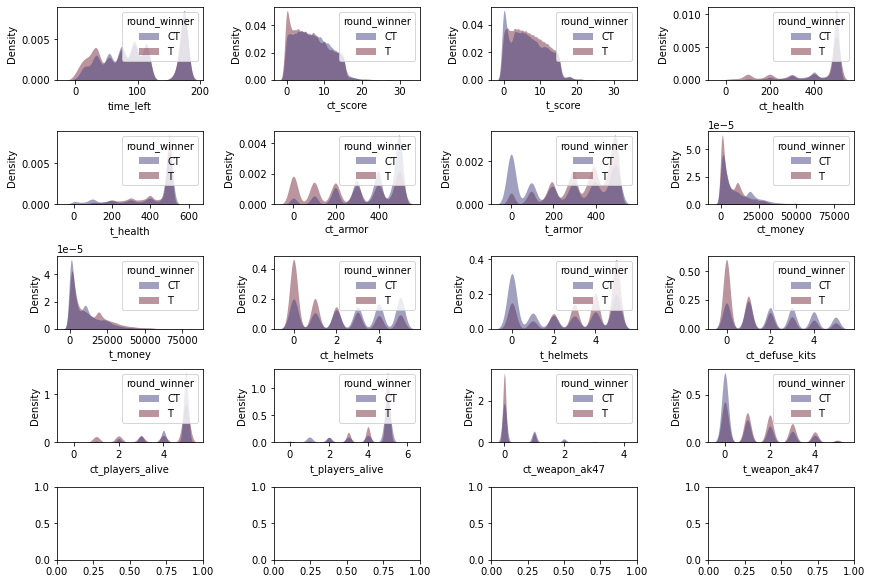

In [16]:
numerical_var = []
for i in df.columns[0:18]:
    if df[i].dtypes == "float64":
        numerical_var.append(i)

# numerical_var = ["time_left", "ct_score", "t_score", "ct_health"]

num_plots = len(numerical_var)
num_cols = 4
num_rows = num_plots // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, constrained_layout=True)
fig.set_size_inches(12, 8)

for subplot, feature in enumerate(numerical_var):
    p_row, p_col = subplot // num_cols, subplot % num_cols
    sns.kdeplot(
        data=df,
        x=feature,
        palette="icefire",
        alpha=0.5,
        linewidth=0,
        fill=True,
        hue="round_winner",
        ax=axs[p_row][p_col],
    )

plt.show()

> Some expected patterns from observing the numerical variables, for example:
when one team has a higher number in money, or apparatus, or players alive, that team tends to win.
CT side tends to win the round faster (more time left)
    

In [123]:
categorical_var = []
for i in df.columns:
    if df[i].dtypes != "float64":
        categorical_var.append(i)


<IPython.core.display.Javascript object>

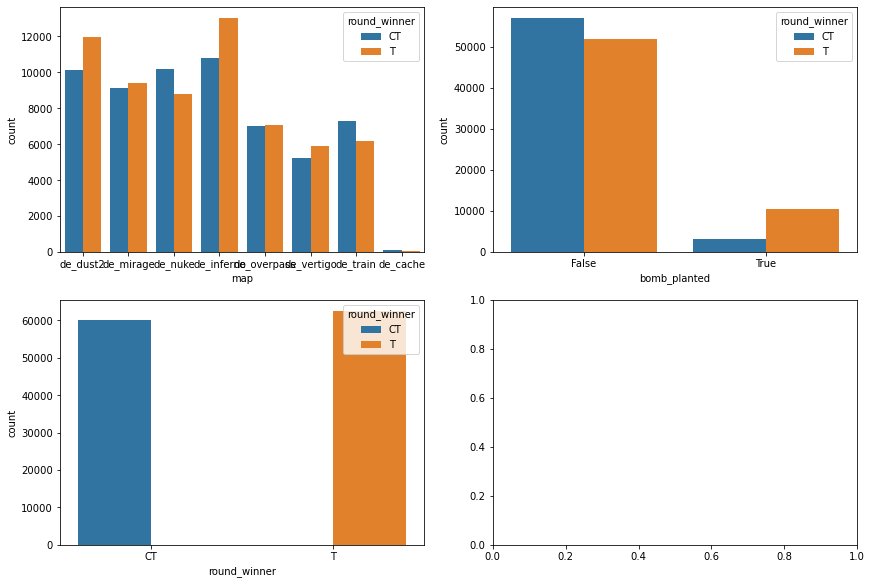

<IPython.core.display.Javascript object>

In [130]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
fig.set_size_inches(12, 8)

for subplot, feature in enumerate(categorical_var):
    p_row, p_col = subplot // num_cols, subplot % num_cols
    sns.countplot(
        data=df,
        x=feature,
        hue="round_winner",
        ax=axs[p_row][p_col],
    )

plt.show()

> 2 maps are more favorable to T, 1 map is favorable to CT. 
> bomb_planted is important to T 


Separate the `ct_` columns and `t_` columns to study more about correlations

In [14]:
t = [colname for colname in df.columns if colname.startswith('t_')]
print(t)

['t_score', 't_health', 't_armor', 't_money', 't_helmets', 't_players_alive', 't_weapon_ak47', 't_weapon_aug', 't_weapon_awp', 't_weapon_bizon', 't_weapon_cz75auto', 't_weapon_elite', 't_weapon_famas', 't_weapon_g3sg1', 't_weapon_galilar', 't_weapon_glock', 't_weapon_m249', 't_weapon_m4a1s', 't_weapon_m4a4', 't_weapon_mac10', 't_weapon_mag7', 't_weapon_mp5sd', 't_weapon_mp7', 't_weapon_mp9', 't_weapon_negev', 't_weapon_nova', 't_weapon_p90', 't_weapon_r8revolver', 't_weapon_sawedoff', 't_weapon_scar20', 't_weapon_sg553', 't_weapon_ssg08', 't_weapon_ump45', 't_weapon_xm1014', 't_weapon_deagle', 't_weapon_fiveseven', 't_weapon_usps', 't_weapon_p250', 't_weapon_p2000', 't_weapon_tec9', 't_grenade_hegrenade', 't_grenade_flashbang', 't_grenade_smokegrenade', 't_grenade_incendiarygrenade', 't_grenade_molotovgrenade', 't_grenade_decoygrenade']


We can largely group the information into 3 categories: 
1. general: timeleft, score, health, money, players_alive 
2. weapon
3. grenade
4. protective quipment: armor, helmets

Look at the correlation within one side attribute

(1.0, -1.0)

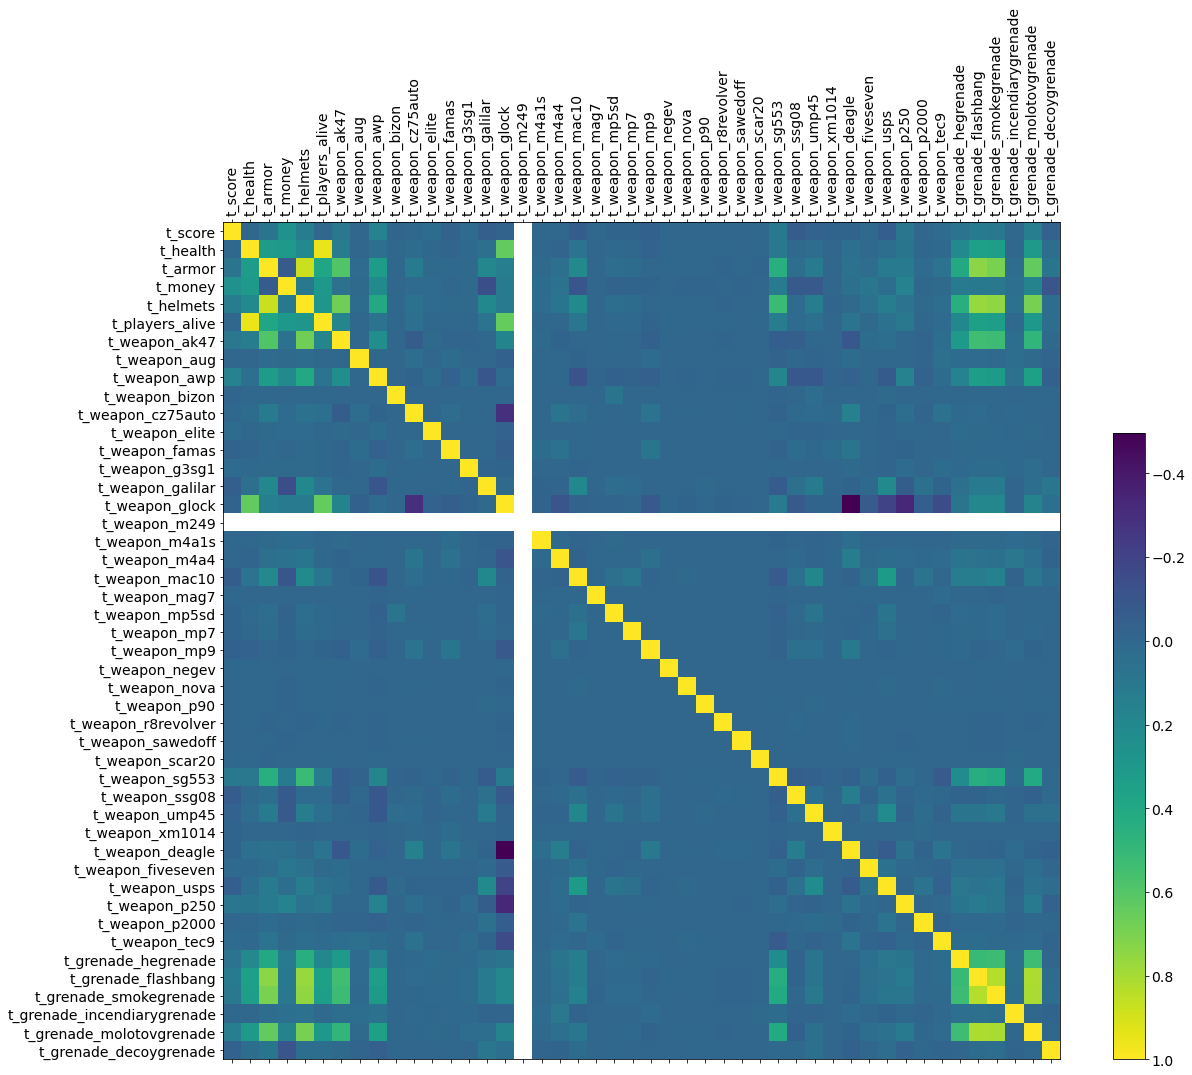

In [18]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df[t].corr(), fignum=f.number)
plt.xticks(range(df[t].shape[1]), df[t].columns, fontsize=14, rotation=90)
plt.yticks(range(df[t].shape[1]), df[t].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
cb.ax.set_ylim(1.0, -1.0)

- players alive and health highly correlated
- armor and helmets highly correlated
- grenades are relatively highly correlated with armor and helmets
- diferent types of grenades are highly correlated with each other

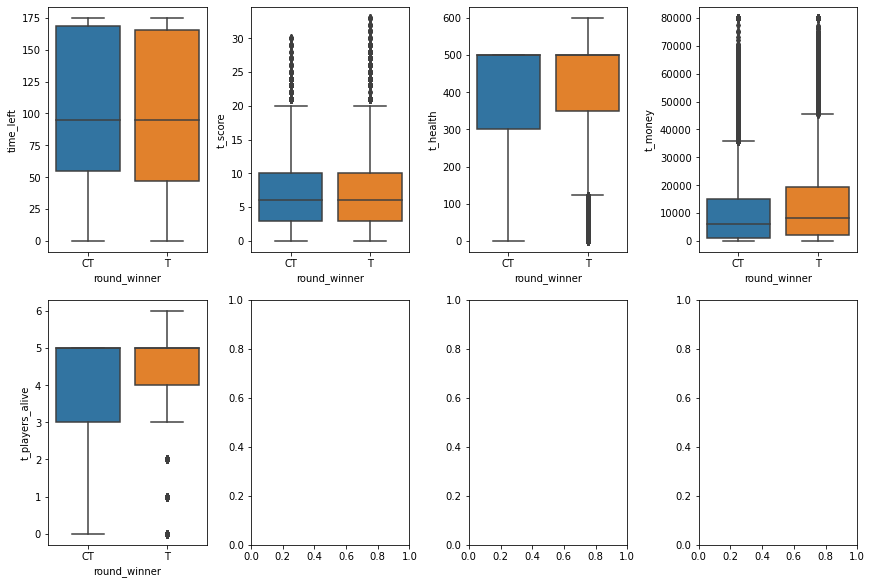

In [21]:
feature_ls = ['time_left','t_score','t_health','t_money','t_players_alive']

num_plots = len(feature_ls)
num_cols = 4
num_rows = num_plots // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, constrained_layout=True)
fig.set_size_inches(12, 8)

for subplot, feature in enumerate(feature_ls):
    p_row, p_col = subplot // num_cols, subplot % num_cols
    sns.boxplot(
        data=df,
        x='round_winner',
        y=feature,
        ax=axs[p_row][p_col],
    )

plt.show()


`t_money` and `t_players_alive`, `t_health` 

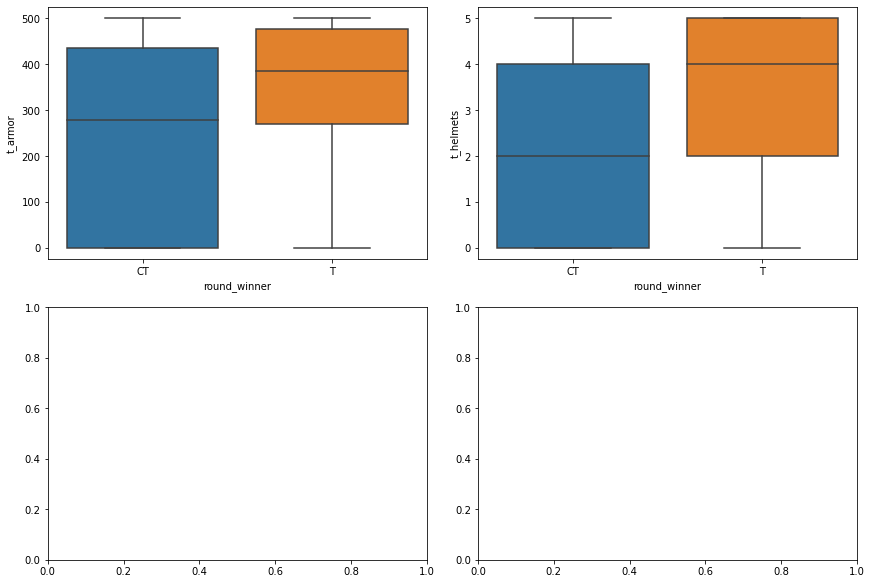

In [25]:
feature_ls = ['t_armor','t_helmets']
              
num_plots = len(feature_ls)
num_cols = 2
num_rows = num_plots // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, constrained_layout=True)
fig.set_size_inches(12, 8)

for subplot, feature in enumerate(feature_ls):
    p_row, p_col = subplot // num_cols, subplot % num_cols
    sns.boxplot(
        data=df,
        x='round_winner',
        y=feature,
        ax=axs[p_row][p_col],
    )

plt.show()

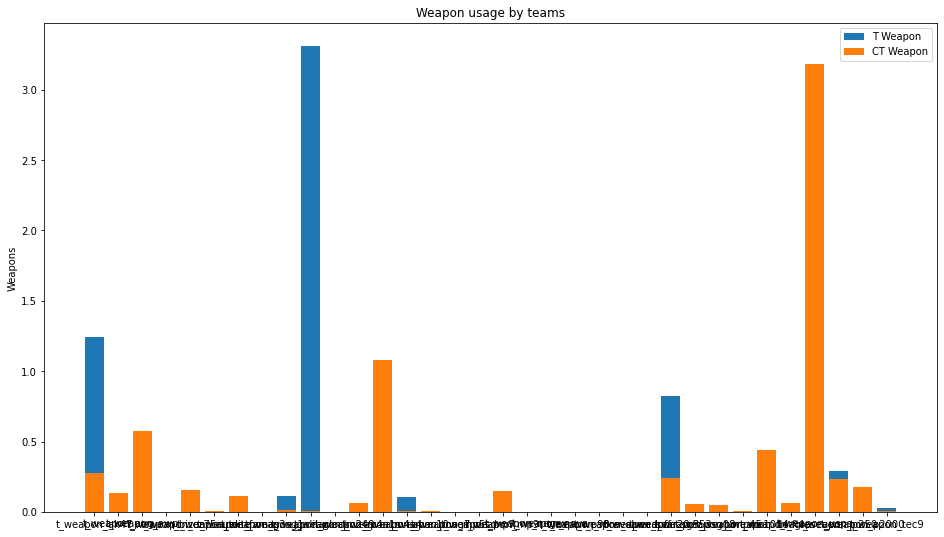

In [64]:
t_weapon = [colname for colname in df.columns if colname.startswith('t_weapon')]
ct_weapon = [colname for colname in df.columns if colname.startswith('ct_weapon')]

fig, ax = plt.subplots(figsize=(16,9))

t_data = df[t_weapon].mean()
ct_data = df[ct_weapon].mean()
x_pos = np.arange(len(t_weapon))

ax.bar( x_pos, t_data, label = 'T Weapon',)
ax.bar( x_pos, ct_data, label = 'CT Weapon',)

ax.set_ylabel('Weapons')
ax.set_title('Weapon usage by teams')
ax.set_xticks(x_pos)
ax.set_xticklabels(t_weapon)
ax.legend()

Weapon choices of the two sides are very different.

Text(0.5, 1.0, 'Grenades Usage')

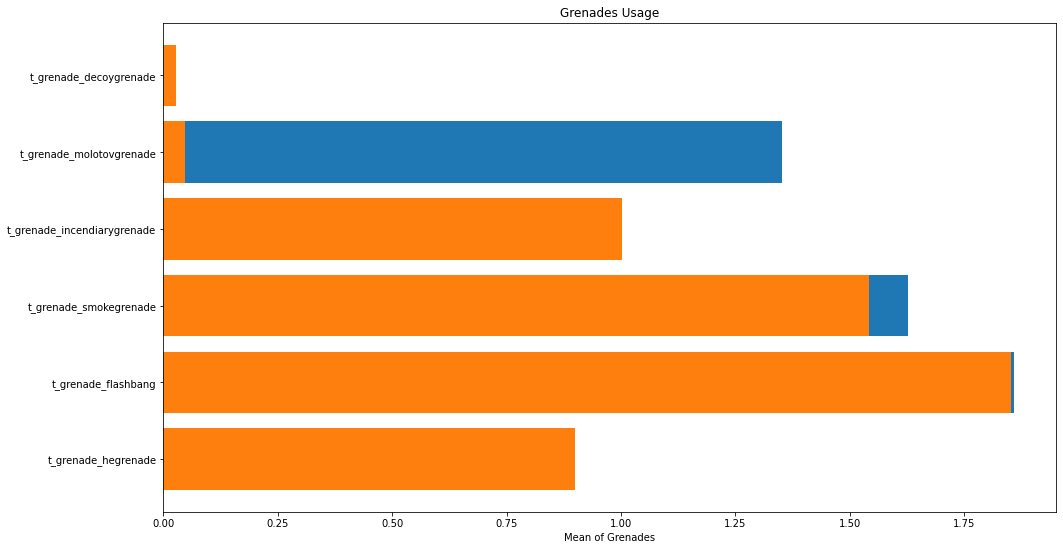

In [54]:
t_grenade = [colname for colname in df.columns if colname.startswith('t_grenade')]
ct_grenade = [colname for colname in df.columns if colname.startswith('ct_grenade')]

fig, ax = plt.subplots(figsize=(16,9))

x = df[t_grenade].mean()
y_pos = np.arange(len(t_grenade))

ax.barh(y_pos, x,align='center',label = 'T Grenades',)
ax.set_yticks(y_pos)

ax.set_yticklabels(t_grenade)
ax.invert_yaxis() 

x = df[ct_grenade].mean()
y_pos = np.arange(len(ct_grenade))

ax.barh(y_pos, x,align='center', label = 'CT Grenades')
ax.set_yticks(y_pos)

ax.set_yticklabels(t_grenade)
ax.invert_yaxis() 
ax.set_xlabel('Mean of Grenades')
ax.set_title('Grenades Usage')


For feature engineering:
1. create a feature combines less used weapons, and keep the weapons that are obviously favored
2. same with grenades
3. 

## 3. Feature Engineering

#### 3.1 Before diving into FE, run a `baseline` model with all numerical features with randomForest

In [288]:
target = "round_winner"
numerical_var = []
for i in df.columns:
    if df[i].dtypes == "float64":
        numerical_var.append(i)

<IPython.core.display.Javascript object>

In [304]:
scaler = StandardScaler().fit(df[numerical_var])
X = scaler.transform(df[numerical_var])

# X = df[numerical_var]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8659423249734499

<IPython.core.display.Javascript object>

In [305]:
# score = []
# name = []
score.append(accuracy)
name.append("RF baseline scaled")

model_performance = pd.DataFrame(data={"model": name, "Accuracy": score})
model_performance

,model,Accuracy
0,RF baseline,0.863900
1,RF baseline remove outliers,0.863423
2,RF baseline PCA remove outliers scaled,0.769477
3,RF baseline scaled,0.865942


<IPython.core.display.Javascript object>

#### 3.2 Removing outliers - does it improve the accuracy score?

In [291]:
from sklearn.ensemble import IsolationForest

<IPython.core.display.Javascript object>

In [292]:
X, y = df[numerical_var].values, df[target].values
print("Before removing outliers:", X.shape, y.shape)

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X)

mask = yhat != -1
X, y = X[mask, :], y[mask]
print("After removing outliers:", X.shape, y.shape)

Before removing outliers: (122410, 94) (122410,)
After removing outliers: (110169, 94) (110169,)


<IPython.core.display.Javascript object>

In [293]:
y = pd.DataFrame(y, columns=[target])
X = pd.DataFrame(X, columns=numerical_var)

df_1 = pd.concat((X, y), axis=1)
df_1.shape

(110169, 95)

<IPython.core.display.Javascript object>

In [294]:
X = df_1[numerical_var]
y = df_1[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

score.append(accuracy)
name.append("RF baseline remove outliers")

model_performance = pd.DataFrame(data={"model": name, "Accuracy": score})
model_performance

,model,Accuracy
0,RF baseline,0.863900
1,RF baseline remove outliers,0.863423


<IPython.core.display.Javascript object>

In [238]:
# y_pred

<IPython.core.display.Javascript object>

> Improved a little bit, not significant. Will keep this step since it doesn't decrease the score

#### 3.2 Feature encoding
We have 1 categorical variable, `map` and 1 boolean varaible `bomb_planted`. 

Use catboost encoder

In [234]:
categorical_var = ["map", "bomb_planted"]

<IPython.core.display.Javascript object>

In [236]:
# Create the Catboost encoder, and "fit" + "transform" our data.
catboost_enc = ce.CatBoostEncoder(cols=categorical_var)
new_columns = catboost_enc.fit(df[categorical_var]).add_suffix(
    "_cb"
)


TypeError: fit() missing 1 required positional argument: 'y'

<IPython.core.display.Javascript object>

#### 3.2 PCA

Simple feature reduction won't be enough, since we have 96 variables. Need to try PCA

In [295]:
scaler = StandardScaler().fit(df_1[numerical_var])
X = scaler.transform(df_1[numerical_var])

<IPython.core.display.Javascript object>

In [296]:
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [297]:
pca = PCA(n_components=5, random_state=42)
features_transormed = pca.fit_transform(X)

<IPython.core.display.Javascript object>

In [298]:
pca.explained_variance_ratio_

array([0.09700637, 0.05446991, 0.05144437, 0.02650559, 0.02392831])

<IPython.core.display.Javascript object>

In [299]:
df_transformed = pd.DataFrame(
    features_transormed, columns=["PC1", "PC2", "PC3", "PC4", "PC5"]
)

<IPython.core.display.Javascript object>

In [300]:
X = df_transformed
y = df_1[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7694774742065293

<IPython.core.display.Javascript object>

In [301]:
score.append(accuracy)
name.append("RF baseline PCA remove outliers scaled")

model_performance = pd.DataFrame(data={"model": name, "Accuracy": score})
model_performance

,model,Accuracy
0,RF baseline,0.863900
1,RF baseline remove outliers,0.863423
2,RF baseline PCA remove outliers scaled,0.769477


<IPython.core.display.Javascript object>

In [303]:
# rf.feature_importances_

<IPython.core.display.Javascript object>